**Import**

In [3]:
# DO NOT CHANGE
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
# DO NOT CHANGE

**Stats Kalista**

In [35]:
itemAD = 8                              # AD of items
itemAS = 0                              # %AS of items

## DO NOT CHANGE
base_as = 0.694
base_ad = np.array([76.93, 79.82, 85.96])
lvl = np.array([4, 5, 7])
Q_base = np.array([20, 85, 150, 215])             # needs + 100% AD
E_base = np.array([20, 30, 40, 50])               # needs + 70% AD
E_bstack = np.array([10, 16, 22, 28])
E_stack = np.array([23.2, 27.55, 31.9, 36.25])    # bonus % AD on each stack
## DO NOT CHANGE

**Damage Calculator**

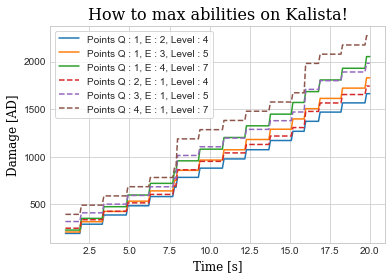

In [42]:
# DO NOT CHANGE
points = np.array([[1,2], # Maxing order for loop
    [1,3],
    [1,4],
    [2,1],
    [3,1],
    [4,1]])

# init figure
fig = plt.figure()
ax = plt.axes()

# init arrays
time = np.zeros(20*10-9)
time_left = np.zeros(20*10-9)
dmg = np.zeros(20*10-9)
for j in range(6):
    AD = base_ad[np.sum(points[j,:])-3] + itemAD
    AS = base_as*(100+itemAS)/100
    AA = AD*0.9
    for i in range(1,20*10-9+1): # time in sec
        time[i-1] = 1 + (i-1)/10
        Q_count = np.floor(time[i-1]/8)+1
        time_left[i-1] = time[i-1] - 0.25*(1+Q_count)
        AA_count = np.floor(time_left[i-1]*AS)
        Q_dmg = Q_base[points[j,0]-1]+AD
        dmg[i-1] = Q_count*Q_dmg + AA_count*AA + E_base[points[j,1]-1]+0.7*AD + E_bstack[points[j,1]-1]*AA_count*((100+E_stack[points[j,1]-1])/100)
    if j <= 2:
        line = '-'
    else:
        line = '--'
    label = "Points Q : %d, E : %d, Level : %d" % (points[j,0], points[j,1], lvl[np.sum(points[j,:])-3])
    ax.plot(time,dmg,line,label=label)
plt.title("How to max abilities on Kalista!", fontdict = {'family':'serif','color':'black','size':16})
plt.xlabel("Time [s]", fontdict = {'family':'serif','color':'black','size':12})
plt.ylabel("Damage [AD]", fontdict = {'family':'serif','color':'black','size':12})
ax.legend(loc='upper left', frameon=True)
# DO NOT CHANGE
